In [1]:
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


'''# 字符类型的时间
tss1 = '2010/04/09 04:44:11'
'''

#converters强制每个标签的数值类型
sheet = pd.read_excel('flare_euv.xlsx',converters={'DATE':str,'START':str,'PEAKT':str,'ENDT':str,'CLASS':str,'SIGN':int,'CLASS_N':float,'SUB':float,'STARTF':float,'ENDF':float,'CON':float,'T_D':int})
sheet1 = pd.read_excel('flare_x.xlsx',converters={'DATE':str,'START':str,'PEAKT':str,'ENDT':str})
#print(type(sheet1['PEAKT'][0]))
#print(type(sheet['PEAKT'][0]))
sheet1.head()

i=0
j=0

while(sheet['N'][i]!=0):
    

    euv_start=sheet['DATE'][i].split(' ')[0]+' '+sheet['START'][i]  #将日期和时间整理拼接成字符串
    euv_peakt=sheet['DATE'][i].split(' ')[0]+' '+sheet['PEAKT'][i]
    euv_endt=sheet['DATE'][i].split(' ')[0]+' '+sheet['ENDT'][i]
    #print(type(sheet1['DATE'][j]))
    #print(j)
    #print(i)
    x_peakt=sheet1['DATE'][j].split(' ')[0]+' '+sheet1['PEAKT'][j]
#print(euv_start)
    timeArray1 = time.strptime(euv_start, "%Y-%m-%d %H:%M:%S")
    timeStamp1 = int(time.mktime(timeArray1))

    timeArray2 = time.strptime(euv_peakt, "%Y-%m-%d %H:%M:%S")
    timeStamp2 = int(time.mktime(timeArray2))

    timeArray3 = time.strptime(euv_endt, "%Y-%m-%d %H:%M:%S")
    timeStamp3 = int(time.mktime(timeArray3))


    timeArray4 = time.strptime(x_peakt, "%d-%m-%Y %H:%M:%S")  #将日期转化为TAI，秒数格式，唯一识别
    timeStamp4 = int(time.mktime(timeArray4))

    if(timeStamp4>timeStamp1) and (timeStamp4<timeStamp3): #比较x的峰值时间是否在ly耀斑的起始和结束时间段内
        #sheet['CLASS'][i]=sheet1['CLASS'][j]
        sheet.loc[i,('CLASS')]=sheet1['CLASS'][j]
        t_d=timeStamp2-timeStamp4
        sheet.loc[i,('T_D')]=t_d
        i=i+1
        j=j+1
    elif timeStamp4<timeStamp1:
        j=j+1
    else:
        i=i+1


k=0
while(sheet['N'][k]!=0):
    if(sheet['CLASS'][k][0]=='B') or (sheet['CLASS'][k][0]=='C') or (sheet['CLASS'][k][0]=='0'):
        sheet.loc[k,('SIGN')]=0  #将M和X级耀斑做标记，后期去掉
        k=k+1
        #print(k)
    elif sheet['CLASS'][k][0]=='M':#取得耀斑级别对应峰值流量
        num=float(sheet['CLASS'][k][1:]) #截取字符串
        num=round(num*(10)**(-5),10)
        sheet.loc[k,('CLASS_N')]=num
        sheet.loc[k,('SIGN')]=2  #将M级耀斑标记为1,后期画图分类
        k=k+1
    elif sheet['CLASS'][k][0]=='X':
        num=float(sheet['CLASS'][k][1:])
        num=round(num*(10)**(-4),10) #取得耀斑级别对应峰值流量,round控制小数位数
        sheet.loc[k,('CLASS_N')]=num #将峰值流量值做成科学计数法，放到CLASS_N标签中
        sheet.loc[k,('SIGN')]=3  #将M级耀斑标记为1,后期画图分类
        k=k+1
    else:
        k=k+1

        
l=0        
while(sheet['N'][l]!=0):
    sheet.loc[l,('DATE')]=sheet['DATE'][l].split(' ')[0]  #将列表中日期后的许多0去掉，美化
    l=l+1
    #print(l)

m=0
while(sheet['N'][m]!=0):
    groud=max(sheet['STARTF'][m],sheet['ENDF'][m])#选取开始或结束中
    #print(type(groud))
    con=sheet['PEAKF'][m]/groud #相对背景的比值
    sub=sheet['PEAKF'][m]-groud #减掉背景后
    sub=round(sub*(10)**(-3),10)
    con=round(con,6)
    sheet.loc[m,('SUB')]=sub
    sheet.loc[m,('CON')]=con
    m=m+1
    

#sheet.head(50)
sheet_new=sheet
sheet_new=sheet_new[sheet_new['SIGN'] != 0]

sheet_new_M=sheet_new
sheet_new_M=sheet_new_M[sheet_new_M['SIGN'] == 2]
sheet_new_X=sheet_new
sheet_new_X=sheet_new_X[sheet_new_X['SIGN'] == 3]

print(len(sheet_new))

sheet_new.head(50)

353


,N,DATE,START,PEAKT,ENDT,DUR(m),STARTF,PEAKF,ENDF,SIGNIF(%),CLASS,SIGN,CLASS_N,SUB,CON,T_D
3,4,2010-06-12,00:53:42,00:56:03,01:03:09,9.5,6.0955,6.2910,6.1316,2.5996,M2.0,2,0.000020,0.000159,1.025996,-57
13,14,2010-08-07,18:03:10,18:14:28,18:36:39,33.5,6.6034,6.7687,6.6494,1.7945,M1.0,2,0.000010,0.000119,1.017941,-572
27,28,2010-10-16,19:09:04,19:10:53,19:21:48,12.7,6.7579,7.1483,6.7954,5.1935,M2.9,2,0.000029,0.000353,1.051932,-67
35,36,2010-11-06,15:27:39,15:34:56,15:36:56,9.3,6.6120,6.8696,6.7533,1.7212,M5.4,2,0.000054,0.000116,1.017221,-64
61,62,2011-01-28,00:54:55,00:59:05,01:05:28,10.5,6.4381,6.5184,6.4381,1.2470,M1.3,2,0.000013,0.000080,1.012473,-235
67,68,2011-02-09,01:24:21,01:28:43,01:33:49,9.5,6.7673,6.9187,6.7545,2.2374,M1.9,2,0.000019,0.000151,1.022372,-137
71,72,2011-02-13,17:31:19,17:34:03,17:57:32,26.2,7.0818,7.3979,7.1528,3.4266,M6.6,2,0.000066,0.000245,1.034266,-237
75,76,2011-02-14,17:19:59,17:25:16,17:53:51,33.9,7.1449,7.7095,7.1837,7.3198,M2.2,2,0.000022,0.000526,1.073193,-44
79,80,2011-02-15,01:45:32,01:52:48,02:46:19,60.8,7.1843,7.6392,7.2134,5.9032,X2.2,3,0.000220,0.000426,1.059029,-192
84,85,2011-02-16,14:16:35,14:24:03,14:34:03,17.5,7.1289,7.4743,7.2226,3.4856,M1.6,2,0.000016,0.000252,1.034849,-57


In [12]:
import datetime
import time
import xlrd
import pandas as pd
print(type(sheet))
#sheet
#sheet.to_csv('flare_euv_x.txt', sep='\t',index=False)
sheet_new.to_csv('flare_euv_x_new_M_all.txt', sep='\t',index=False)

<class 'pandas.core.frame.DataFrame'>


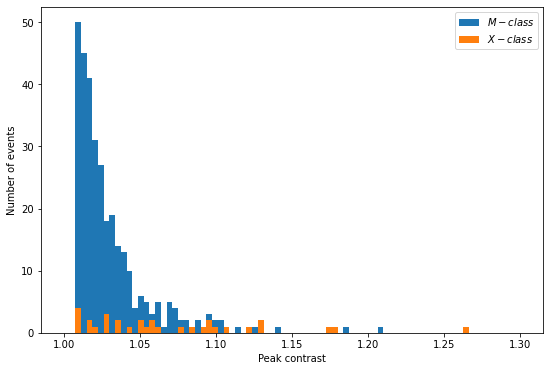

(array([ 0.,  0., 18., 43., 38., 31., 37., 16., 20., 19., 14., 17.,  7.,
        10., 11.,  2.,  7.,  6.,  5.,  3.,  4.,  3.,  2.,  5.,  2.,  3.,
         1.,  3.,  1.,  1.,  1.,  3.,  5.,  1.,  1.,  1.,  1.,  1.,  0.,
         0.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([1.   , 1.003, 1.006, 1.009, 1.012, 1.015, 1.018, 1.021, 1.024,
        1.027, 1.03 , 1.033, 1.036, 1.039, 1.042, 1.045, 1.048, 1.051,
        1.054, 1.057, 1.06 , 1.063, 1.066, 1.069, 1.072, 1.075, 1.078,
        1.081, 1.084, 1.087, 1.09 , 1.093, 1.096, 1.099, 1.102, 1.105,
        1.108, 1.111, 1.114, 1.117, 1.12 , 1.123, 1.126, 1.129, 1.132,
        1.135, 1.138, 1.141, 1.144, 1.147, 1.15 , 1.153, 1.156, 1.159,
        

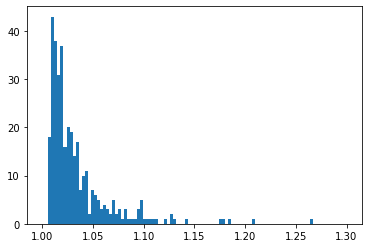

In [2]:
#sheet_new['SIGNIF(%)'].hist()
plt.figure(figsize=(9, 6))
plt.hist(sheet_new_M['CON'], bins = 80, range=(1,1.3),label = r'$M-class$') #bins代表条形箱子的个数
plt.hist(sheet_new_X['CON'], bins = 80, range=(1,1.3),label = r'$X-class$') #bins代表条形箱子的个数
plt.xlabel('Peak contrast')

plt.ylabel('Number of events')
plt.legend() #图例

plt.show()
plt.hist(sheet_new['CON'], bins = 100, range=(1,1.3),label = r'$X-class$') #bins代表条形箱子的个数

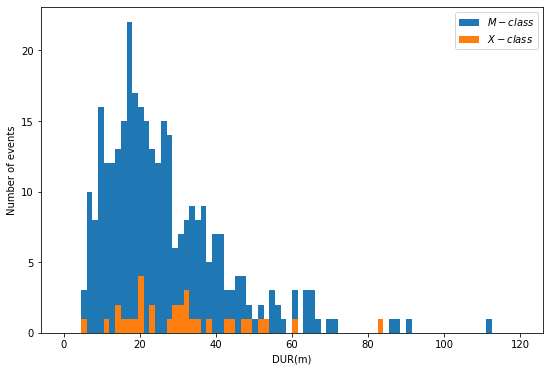

In [3]:
#sheet_new['SIGNIF(%)'].hist()
plt.figure(figsize=(9, 6))
plt.hist(sheet_new_M['DUR(m)'], bins = 80, range=(0,120),label = r'$M-class$') #bins代表条形箱子的个数
plt.hist(sheet_new_X['DUR(m)'], bins = 80, range=(0,120),label = r'$X-class$') #bins代表条形箱子的个数
plt.xlabel('DUR(m)')
plt.ylabel('Number of events')
plt.legend() #图例
plt.show()

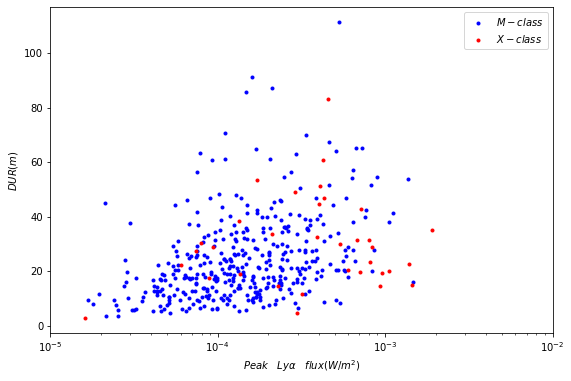

In [4]:
plt.figure(figsize=(9, 6))
plt.xscale('log')
plt.xlim(10**(-5),10**(-2))
plt.plot(sheet_new_M['SUB'],sheet_new_M['DUR(m)'],'b.',label = r'$M-class$')
plt.plot(sheet_new_X['SUB'],sheet_new_X['DUR(m)'],'r.',label = r'$X-class$')
plt.xlabel(r'$Peak \quad Lyα \quad flux (W/m^2)$')
plt.ylabel(r'$DUR(m)$')
plt.legend() #图例

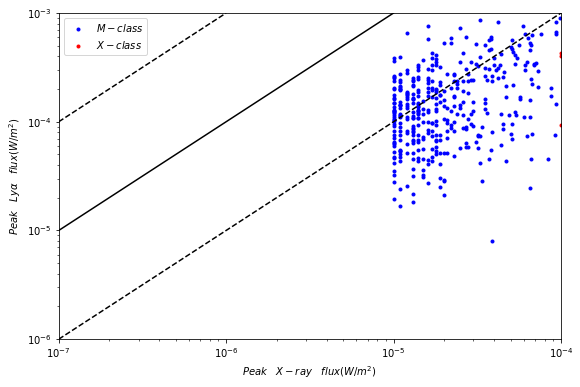

In [14]:
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sheet_new_M=sheet_new
sheet_new_M=sheet_new_M[sheet_new_M['SIGN'] == 2]
sheet_new_X=sheet_new
sheet_new_X=sheet_new_X[sheet_new_X['SIGN'] == 3]

x=sheet_new_M['CLASS_N']
y=sheet_new_M['SUB']

x1=sheet_new_X['CLASS_N']
y1=sheet_new_X['SUB']

x2=[10**(-7),10**(-4)]
y2=[10**(-6),10**(-3)]
x3=[10**(-7),10**(-5)]
y3=[10**(-5),10**(-3)]
x4=[10**(-7),10**(-6)]
y4=[10**(-4),10**(-3)]

plt.figure(figsize=(9, 6))
#plt.scatter(x, y)
plt.loglog(x, y,'b.',label=r'$M-class$')
plt.loglog(x1,y1,'r.',label=r'$X-class$')

plt.plot(x2,y2,'--',color='black')
plt.plot(x3,y3,'-',color='black')
plt.plot(x4,y4,'--',color='black')

plt.ylim(10**(-6),10**(-3))
plt.xlim(10**(-7),10**(-4))

plt.xlabel(r'$Peak \quad X-ray \quad flux (W/m^2)$')
plt.ylabel(r'$Peak \quad Lyα \quad flux (W/m^2)$')
plt.legend() #图例
plt.show()

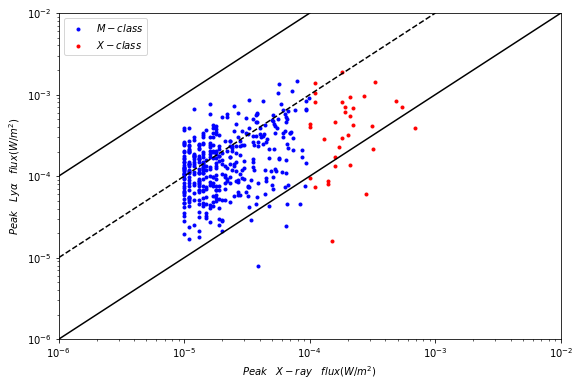

In [17]:
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sheet_new_M=sheet_new
sheet_new_M=sheet_new_M[sheet_new_M['SIGN'] == 2]
sheet_new_X=sheet_new
sheet_new_X=sheet_new_X[sheet_new_X['SIGN'] == 3]

x=sheet_new_M['CLASS_N']
y=sheet_new_M['SUB']

x1=sheet_new_X['CLASS_N']
y1=sheet_new_X['SUB']

x2=[10**(-7),10**(-3)]
y2=[10**(-6),10**(-2)]

x3=[10**(-7),10**(-4)]
y3=[10**(-5),10**(-2)]
x4=[10**(-7),10**(-6)]
y4=[10**(-4),10**(-3)]

x5=[10**(-6),10**(-2)]
y5=[10**(-6),10**(-2)]

plt.figure(figsize=(9, 6))
#plt.scatter(x, y)
plt.loglog(x, y,'b.',label=r'$M-class$')
plt.loglog(x1,y1,'r.',label=r'$X-class$')

plt.plot(x2,y2,'--',color='black')
plt.plot(x3,y3,'-',color='black')
plt.plot(x4,y4,'--',color='black')
plt.plot(x5,y5,'-',color='black')

plt.ylim(10**(-6),10**(-2))
plt.xlim(10**(-6),10**(-2))

plt.xlabel(r'$Peak \quad X-ray \quad flux (W/m^2)$')
plt.ylabel(r'$Peak \quad Lyα \quad flux (W/m^2)$')
plt.legend() #图例
plt.show()